<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Предоработка-данных" data-toc-modified-id="Предоработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предоработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-расчета-метрики" data-toc-modified-id="Функция-расчета-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция расчета метрики</a></span></li><li><span><a href="#Функция-обработки-выборок" data-toc-modified-id="Функция-обработки-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция обработки выборок</a></span></li><li><span><a href="#Модель-градиентного-бустинга" data-toc-modified-id="Модель-градиентного-бустинга-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель градиентного бустинга</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерево-решений" data-toc-modified-id="Модель-дерево-решений-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель дерево решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost as cb
import seaborn as sns

from sklearn.model_selection import (train_test_split,
                                     GridSearchCV, 
                                     cross_val_score)
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from scipy import stats


import warnings

In [2]:
RANDOM_STATE = 12345

In [3]:
warnings.filterwarnings("ignore")

## Подготовка данных

### Выгрузка данных

In [4]:
df = pd.read_csv('/datasets/gold_industry_full.csv')
df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [6]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [7]:
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [8]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(19439, 87)
(14579, 87)
(4860, 53)


Некоторых колонок нет в тестовом датафрейме, необходимо понять каких и почему.

In [9]:
non_test_cols = list(set(df_train) - set(df_test))
pd.Series(non_test_cols).to_frame()

,0
0,rougher.calculation.sulfate_to_au_concentrate
1,rougher.output.concentrate_ag
2,final.output.tail_au
3,final.output.tail_ag
4,rougher.calculation.floatbank10_sulfate_to_au_...
5,final.output.concentrate_ag
6,rougher.calculation.au_pb_ratio
7,rougher.output.tail_sol
8,primary_cleaner.output.tail_sol
9,primary_cleaner.output.tail_pb


Все признаки, отсутствующие в тестовой выборке относятся к выходным данным каждого этапа обработки, а также, к расчетным характеристикам после этапа обогащения. Это является следствием того, что эти параметры еще не рассчитаны.

### Предоработка данных

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [10]:
def recovery(C, F, T):
    result = (C * (F - T)) / (F * (C - T)) * 100
    return result

In [11]:
recovery = pd.Series(recovery(df_train['rougher.output.concentrate_au'], 
                             df_train['rougher.input.feed_au'], 
                             df_train['rougher.output.tail_au']))

mean_absolute_error(df_train['rougher.output.recovery'], recovery)

9.83758577644259e-15

Отклоение получилось очень низким, следовательно эффективность обогащения рассчитана правильно 

In [12]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [13]:
df.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [14]:
df = df.ffill()
df_train = df_train.ffill()
df_test = df_test.ffill()

df.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

## Анализ данных

In [15]:
def concentration(rougher_input, rougher_output, primary_cleaner, final_output, title: str):
    plt.figure(figsize=(15,7))
    rougher_input.hist(bins=21, alpha=0.5, color='red')
    rougher_output.hist(bins=21, alpha=0.5, color='yellow')
    primary_cleaner.hist(bins=21, alpha=0.5, color='green')
    final_output.hist(bins=21, alpha=0.5, color='black')
    plt.title(title)
    plt.xlabel('Значение признака')
    plt.ylabel('Количество')
    plt.legend(['Концентрация до обогащения', 
            'Концентрация после обогащения', 
            'Концентрация после первой очистки', 
            'Концентрация финальная'])
    plt.show()

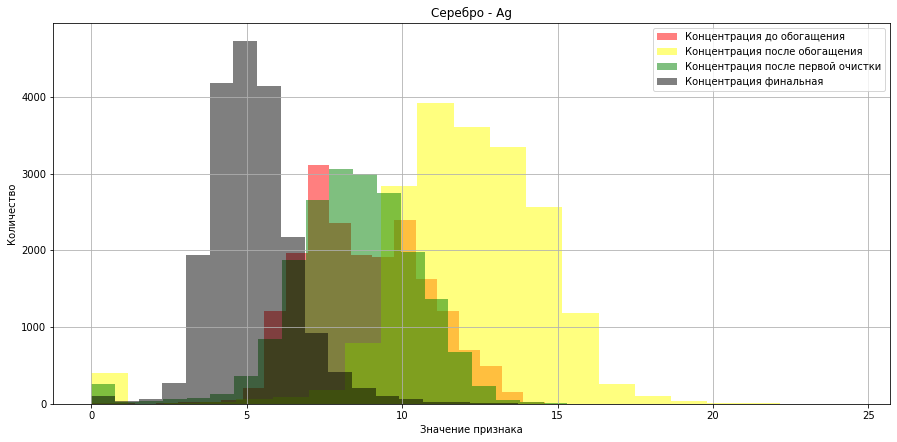

In [16]:
concentration(df['rougher.input.feed_ag'], 
              df['rougher.output.concentrate_ag'], 
              df['primary_cleaner.output.concentrate_ag'], 
              df['final.output.concentrate_ag'],
              'Серебро - Ag')

Концентрация серебра сначала растет, затем снижается.

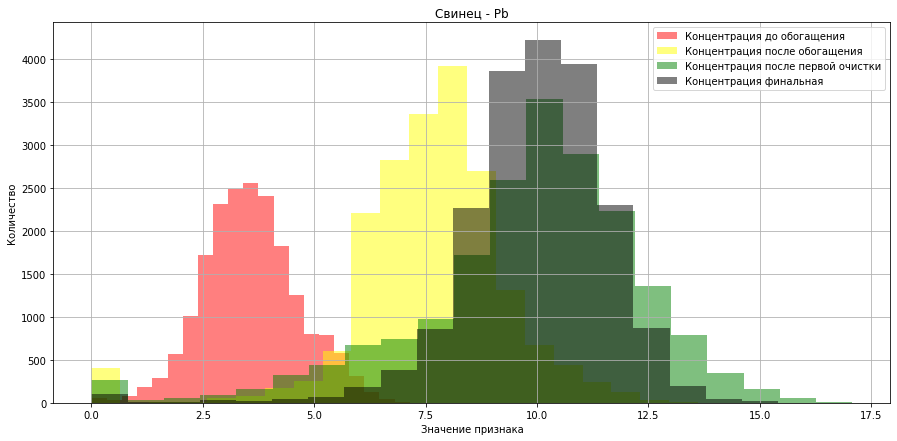

In [17]:
concentration(df['rougher.input.feed_pb'], 
              df['rougher.output.concentrate_pb'], 
              df['primary_cleaner.output.concentrate_pb'], 
              df['final.output.concentrate_pb'],
              'Свинец - Pb')

Концентрация свинца увеличивается до определенного значания, затем не изменяется

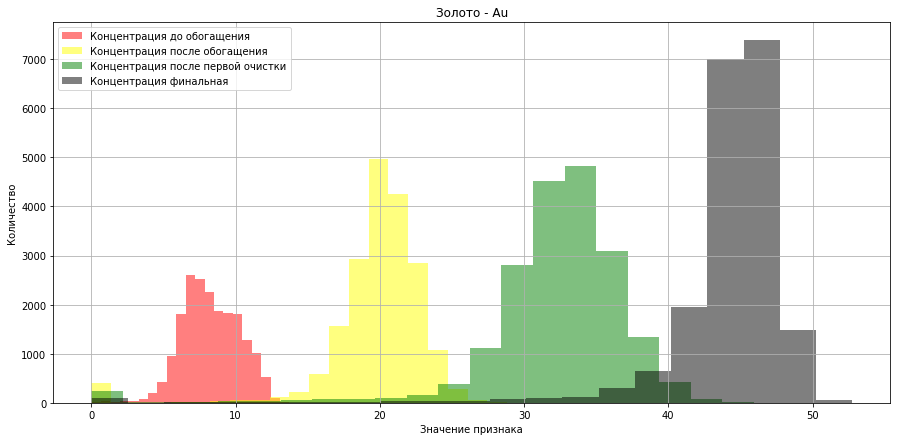

In [18]:
concentration(df['rougher.input.feed_au'], 
              df['rougher.output.concentrate_au'], 
              df['primary_cleaner.output.concentrate_au'], 
              df['final.output.concentrate_au'],
              'Золото - Au')

Как и ожидалось концентрация золота повышается на каждом этапе.

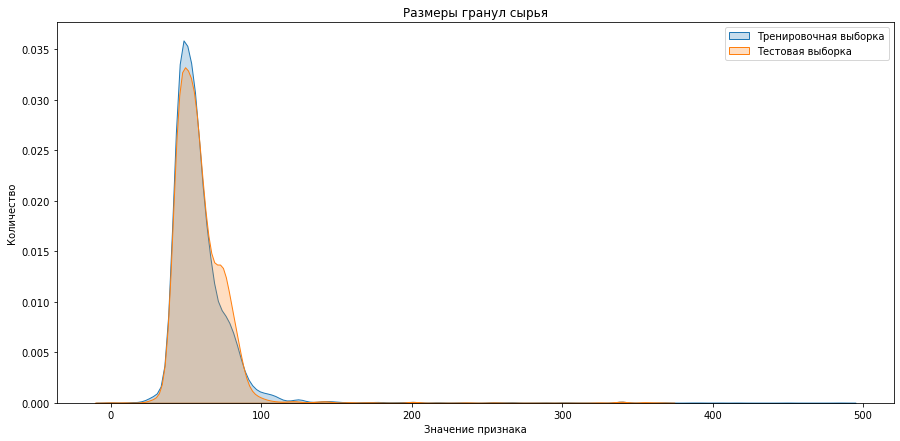

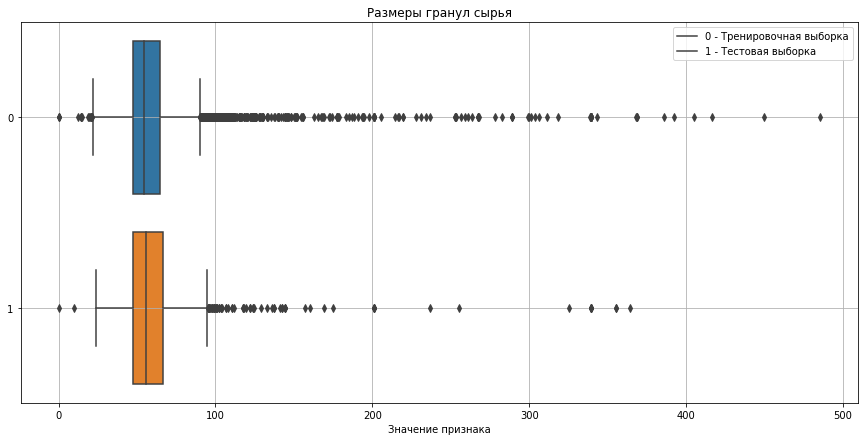

In [19]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_train['rougher.input.feed_size'], shade=True)
sns.kdeplot(df_test['rougher.input.feed_size'], shade=True)
plt.title('Размеры гранул сырья')
plt.xlabel('Значение признака')
plt.ylabel('Количество')
plt.legend(['Тренировочная выборка', 'Тестовая выборка'])
plt.show()


plt.figure(figsize=(15,7))
sns.boxplot(data=[df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']],orient='h')
plt.grid()
plt.xlabel('Значение признака')
plt.title('Размеры гранул сырья')
plt.legend(['0 - Тренировочная выборка', '1 - Тестовая выборка'])
plt.show()

Распределения у тренировочной и тестовой выборки схожи.

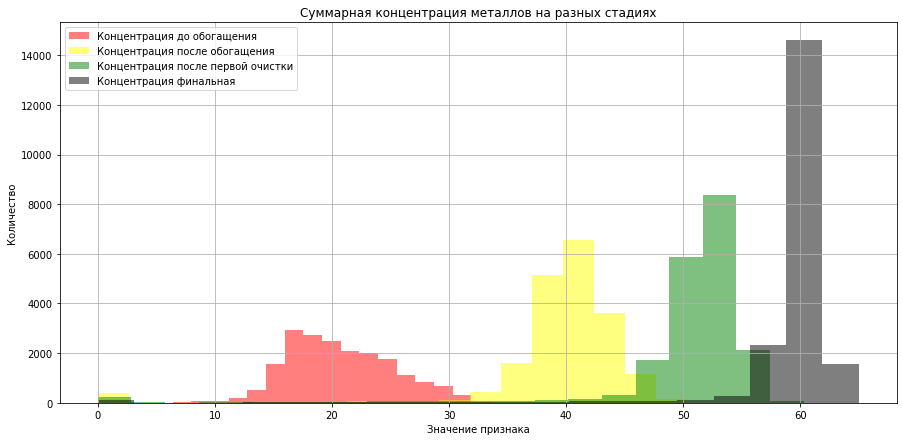

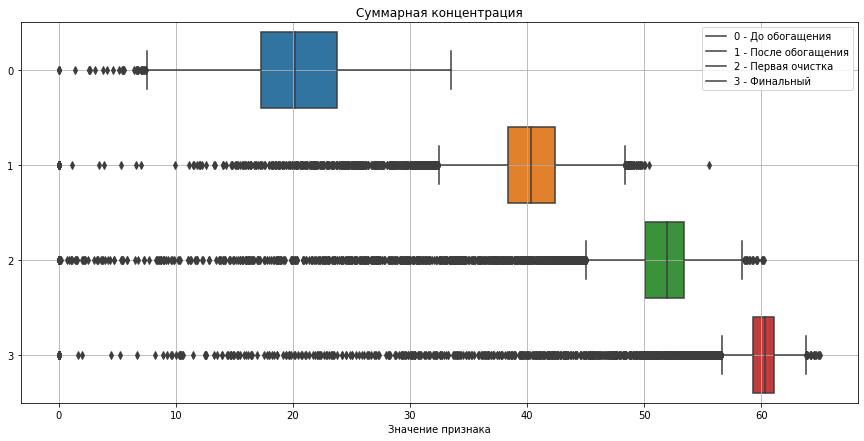

In [20]:
rougher_input_sum = df[['rougher.input.feed_ag', 
                         'rougher.input.feed_pb', 
                         'rougher.input.feed_au']].sum(axis=1)

rougher_output_sum = df[['rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_au']].sum(axis=1)

primary_cleaner_sum = df[['primary_cleaner.output.concentrate_ag', 
                          'primary_cleaner.output.concentrate_pb', 
                          'primary_cleaner.output.concentrate_au']].sum(axis=1)


final_output_sum = df[['final.output.concentrate_ag', 
                       'final.output.concentrate_pb', 
                       'final.output.concentrate_au']].sum(axis=1)


concentration(rougher_input_sum, 
              rougher_output_sum, 
              primary_cleaner_sum , 
              final_output_sum,
              'Суммарная концентрация металлов на разных стадиях')


plt.figure(figsize=(15,7))
sns.boxplot(data=[rougher_input_sum, rougher_output_sum, primary_cleaner_sum, final_output_sum],orient='h')
plt.grid()
plt.xlabel('Значение признака')
plt.title('Суммарная концентрация')
plt.legend(['0 - До обогащения', 
            '1 - После обогащения', 
            '2 - Первая очистка',
            '3 - Финальный'])
plt.show()

Как и ожидалось концентрация металлов увеличивается с каждым этапом, при этом концентрация золота самая высокая.

Убрем выборосы из обучающего датафрейма

In [21]:
df_train.shape

(14579, 87)

In [22]:
df_train = df_train.loc[rougher_input_sum > 10]
df_train = df_train.loc[rougher_output_sum > 30]
df_train = df_train.loc[primary_cleaner_sum > 40]
df_train = df_train.loc[final_output_sum > 45]

In [23]:
df_train.shape

(13106, 87)

## Модель

### Функция расчета метрики

In [24]:
def smape(target, predictions):
    result = abs(target - predictions) / ((abs(target) + abs(predictions)) / 2) * 100
    return result.mean()

In [25]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [26]:
def total_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

### Функция обработки выборок

Удалим из тренировочных данных признаки, которых нет в тестовой выборке. Обучать по ним модель некорректно, так как в реальной работе она не получит этих данных. Перед удалением признаков, сохраним целевые признаки в датафрейм target

In [27]:
def data_reset(train):
    
    target_rougher = train['rougher.output.recovery']
    target_final = train['final.output.recovery']

    features = train.drop(non_test_cols, axis=1)
    features_rougher = features.drop('date', axis=1)
    features_final = features.drop('date', axis=1)
    
    return (features_rougher, features_final, target_rougher, target_final)

In [28]:
features_rougher, features_final, target_rougher, target_final = data_reset(df_train)

### Модель градиентного бустинга

In [31]:
cb_smape_rougher = abs(cb_scores.mean())
print('Метрика SMAPE для предсказаний rougher: ', cb_smape_rougher)

Метрика SMAPE для предсказаний rougher:  5.644385450945181


In [32]:
cb_final_rougher = cb.CatBoostRegressor(loss_function='MAPE', eval_metric='SMAPE', verbose=200)
cb_final_scores = cross_val_score(cb_final_rougher, 
                                  features_final, 
                                  target_final, 
                                  cv=5, 
                                  scoring=smape_scorer, 
                                  n_jobs=-1, 
                                  verbose=10)

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 8.7925498	total: 15.6ms	remaining: 15.6s
200:	learn: 6.5244743	total: 3.37s	remaining: 13.4s
400:	learn: 5.9035041	total: 6.68s	remaining: 9.98s
600:	learn: 5.5559875	total: 10.1s	remaining: 6.7s
800:	learn: 5.3080339	total: 13.4s	remaining: 3.34s
999:	learn: 5.1142208	total: 16.7s	remaining: 0us
[CV] END ............................... score: (test=-9.700) total time=  18.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


0:	learn: 9.5493052	total: 15.7ms	remaining: 15.7s
200:	learn: 7.2399483	total: 3.26s	remaining: 13s
400:	learn: 6.6635843	total: 6.5s	remaining: 9.71s
600:	learn: 6.3977228	total: 9.8s	remaining: 6.51s
800:	learn: 6.1970731	total: 12.9s	remaining: 3.21s
999:	learn: 6.0709512	total: 15.9s	remaining: 0us
[CV] END ............................... score: (test=-6.942) total time=  17.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   36.4s remaining:    0.0s


0:	learn: 9.2625648	total: 15.4ms	remaining: 15.4s
200:	learn: 7.0472448	total: 3.33s	remaining: 13.2s
400:	learn: 6.5374844	total: 6.61s	remaining: 9.88s
600:	learn: 6.2696487	total: 9.73s	remaining: 6.46s
800:	learn: 6.0773377	total: 12.9s	remaining: 3.21s
999:	learn: 5.9538835	total: 16s	remaining: 0us
[CV] END ............................... score: (test=-8.582) total time=  17.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.2s remaining:    0.0s


0:	learn: 9.2565225	total: 17.2ms	remaining: 17.1s
200:	learn: 6.9908579	total: 3.4s	remaining: 13.5s
400:	learn: 6.4076777	total: 6.72s	remaining: 10s
600:	learn: 6.0901335	total: 9.84s	remaining: 6.53s
800:	learn: 5.8719631	total: 13.1s	remaining: 3.25s
999:	learn: 5.7000188	total: 16.2s	remaining: 0us
[CV] END ............................... score: (test=-7.876) total time=  17.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


0:	learn: 9.0949396	total: 15.4ms	remaining: 15.4s
200:	learn: 7.1007574	total: 3.37s	remaining: 13.4s
400:	learn: 6.5241395	total: 6.65s	remaining: 9.93s
600:	learn: 6.2293951	total: 9.72s	remaining: 6.46s
800:	learn: 6.0418216	total: 12.9s	remaining: 3.2s
999:	learn: 5.8430321	total: 16.4s	remaining: 0us
[CV] END ............................... score: (test=-8.607) total time=  18.6s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [33]:
cb_smape_final = abs(cb_final_scores.mean())
print('Метрика SMAPE для предсказаний final: ', cb_smape_final)

Метрика SMAPE для предсказаний final:  8.341404511834165


In [34]:
print('Итоговое sMAPE CatBoost:', total_smape(cb_smape_rougher, cb_smape_final))

Итоговое sMAPE CatBoost: 7.667149746611919


### Модель линейной регрессии

In [35]:
lr_rougher = LinearRegression()
lr_scores = cross_val_score(lr_rougher, 
                            features_rougher, 
                            target_rougher, 
                            cv=5, 
                            scoring=smape_scorer, 
                            n_jobs=-1,
                            verbose=10)

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.660) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ............................... score: (test=-5.334) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.768) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-4.714) total time=   0.3s
[CV] START .....................................................................
[CV] END ............................... score: (test=-8.706) total time=   0.1s


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [36]:
lr_smape_rougher = abs(lr_scores.mean())
print('Метрика SMAPE для предсказаний rougher: ', lr_smape_rougher)

Метрика SMAPE для предсказаний rougher:  7.036204516302165


In [37]:
lr_final = LinearRegression()
lr_final_scores = cross_val_score(lr_rougher, 
                                  features_final, 
                                  target_final, 
                                  cv=5, 
                                  scoring=smape_scorer, 
                                  n_jobs=-1, 
                                  verbose=10)

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.951) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.699) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.767) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.275) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.978) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [38]:
lr_smape_final = abs(lr_final_scores.mean())
print('Метрика SMAPE для предсказаний final: ', lr_smape_final)

Метрика SMAPE для предсказаний final:  9.333974508439317


In [39]:
print('Итоговое sMAPE Линейной регрессии:', total_smape(lr_smape_rougher, lr_smape_final))

Итоговое sMAPE Линейной регрессии: 8.759532010405028


### Модель дерево решений

In [40]:
dtr_rougher = DecisionTreeRegressor(random_state=RANDOM_STATE)

parameters = {"splitter":["random"],
              "max_depth" : [7,9],
              "min_samples_leaf":[4,6],
              "max_features":["sqrt",None],
              "max_leaf_nodes":[None,10,30]
             }

dtr_tuned = GridSearchCV(dtr_rougher,
                         param_grid=parameters,
                         scoring=smape_scorer,
                         cv=3,verbose=3, 
                         n_jobs=-1)
dtr_tuned.fit(features_rougher,target_rougher)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9], 'max_features': ['sqrt', None],
                         'max_leaf_nodes': [None, 10, 30],
                         'min_samples_leaf': [4, 6], 'splitter': ['random']},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

Лучшие гиперпараметры

In [41]:
dtr_tuned.best_params_

{'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [42]:
dtr_smape_rougher = abs(dtr_tuned.cv_results_['mean_test_score'].mean())
print('Метрика SMAPE для предсказаний rougher: ', dtr_smape_rougher)

Метрика SMAPE для предсказаний rougher:  7.535173595874691


In [43]:
dtr_final = DecisionTreeRegressor(random_state=RANDOM_STATE)


parameters = {"splitter":["best"],
              "max_depth" : [7,9],
              "min_samples_leaf":[6,8],
              "max_features":["auto",None],
              "max_leaf_nodes":[None,10,30]
             }

dtr_final_tuned = GridSearchCV(dtr_final,
                               param_grid=parameters,
                               scoring=smape_scorer,
                               cv=3,verbose=3, 
                               n_jobs=-1)
dtr_final_tuned.fit(features_final,target_final)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.3s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.3s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.3s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.3s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.3s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.3s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; total time=   0.2s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; to

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9], 'max_features': ['auto', None],
                         'max_leaf_nodes': [None, 10, 30],
                         'min_samples_leaf': [6, 8], 'splitter': ['best']},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

Лучшие гиперпараметры

In [44]:
dtr_final_tuned.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [45]:
dtr_smape_final = abs(dtr_final_tuned.cv_results_['mean_test_score'].mean())
print('Метрика SMAPE для предсказаний final: ', dtr_smape_final)

Метрика SMAPE для предсказаний final:  10.272682031836977


In [46]:
print('Итоговое sMAPE решающего дерева:', total_smape(dtr_smape_rougher, dtr_smape_final))

Итоговое sMAPE решающего дерева: 9.588304922846405


### Модель случайного леса

In [47]:
rfr_rougher = RandomForestRegressor(random_state=RANDOM_STATE)

parameters = {'max_depth': [3, 5],  
              'n_estimators': [100]}

rfr_tuner = GridSearchCV(rfr_rougher,
                         param_grid=parameters,
                         scoring=smape_scorer,
                         cv=3,
                         verbose=10, 
                         n_jobs=-1)

rfr_tuner.fit(features_rougher,target_rougher)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START max_depth=3, n_estimators=100...............................
[CV 1/3; 1/2] END .............max_depth=3, n_estimators=100; total time=   8.7s
[CV 2/3; 1/2] START max_depth=3, n_estimators=100...............................
[CV 2/3; 1/2] END .............max_depth=3, n_estimators=100; total time=   8.4s
[CV 3/3; 1/2] START max_depth=3, n_estimators=100...............................
[CV 3/3; 1/2] END .............max_depth=3, n_estimators=100; total time=   8.4s
[CV 1/3; 2/2] START max_depth=5, n_estimators=100...............................
[CV 1/3; 2/2] END .............max_depth=5, n_estimators=100; total time=  13.5s
[CV 2/3; 2/2] START max_depth=5, n_estimators=100...............................
[CV 2/3; 2/2] END .............max_depth=5, n_estimators=100; total time=  13.5s
[CV 3/3; 2/2] START max_depth=5, n_estimators=100...............................
[CV 3/3; 2/2] END .............max_depth=5, n_esti

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [3, 5], 'n_estimators': [100]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

Лучшие гиперпараметры

In [48]:
rfr_tuner.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [49]:
rfr_smape_rougher = abs(rfr_tuner.cv_results_['mean_test_score'].mean())
print('Метрика SMAPE для предсказаний rougher: ', rfr_smape_rougher)

Метрика SMAPE для предсказаний rougher:  6.390632709603167


In [50]:
rfr_final_tuner = RandomForestRegressor(random_state=RANDOM_STATE)

parameters = {'max_depth': [3, 5],  
              'n_estimators': [150]
             }

rfr_final_tuner = GridSearchCV(rfr_final_tuner,
                               param_grid=parameters,
                               scoring=smape_scorer,
                               cv=3,
                               verbose=10, 
                               n_jobs=-1)

rfr_final_tuner.fit(features_final,target_final)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START max_depth=3, n_estimators=150...............................
[CV 1/3; 1/2] END .............max_depth=3, n_estimators=150; total time=  12.5s
[CV 2/3; 1/2] START max_depth=3, n_estimators=150...............................
[CV 2/3; 1/2] END .............max_depth=3, n_estimators=150; total time=  12.8s
[CV 3/3; 1/2] START max_depth=3, n_estimators=150...............................
[CV 3/3; 1/2] END .............max_depth=3, n_estimators=150; total time=  12.6s
[CV 1/3; 2/2] START max_depth=5, n_estimators=150...............................
[CV 1/3; 2/2] END .............max_depth=5, n_estimators=150; total time=  19.9s
[CV 2/3; 2/2] START max_depth=5, n_estimators=150...............................
[CV 2/3; 2/2] END .............max_depth=5, n_estimators=150; total time=  19.7s
[CV 3/3; 2/2] START max_depth=5, n_estimators=150...............................
[CV 3/3; 2/2] END .............max_depth=5, n_esti

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': [3, 5], 'n_estimators': [150]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

Лучшие гиперпараметры

In [51]:
rfr_final_tuner.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [52]:
rfr_smape_final = abs(rfr_final_tuner.cv_results_['mean_test_score'].mean())
print('Метрика SMAPE для предсказаний final: ', rfr_smape_final)

Метрика SMAPE для предсказаний final:  9.60340391994219


In [53]:
print('Итоговое sMAPE случайного леса:', total_smape(rfr_smape_rougher, rfr_smape_final))

Итоговое sMAPE случайного леса: 8.800211117357435


### Выводы

По итогам проверки четырех моделей:

- Итоговое sMAPE CatBoost: 7.67
- Итоговое sMAPE линейной регрессии: 8.76
- Итоговое sMAPE решающего дерева: 9.59
- Итоговое sMAPE случайного леса: 8.80

Для тестовой выборки будем использовать моедль градиентный бустинг

## Проверка на тестовой выборке

Для начало необходимо обрабоать признаки в тестовом датафрейме

In [54]:
test_target = pd.merge(df_test, 
                       df[['date','rougher.output.recovery','final.output.recovery']], 
                       how='left', 
                       on='date')

test_rougher_target = test_target['rougher.output.recovery']
test_rougher_features = df_test.drop('date', axis=1)

test_final_target = test_target['final.output.recovery']
test_final_features = df_test.drop('date', axis=1)

In [56]:
cb_rougher = cb.CatBoostRegressor(loss_function='MAPE', eval_metric='SMAPE', verbose=200)
cb_rougher.fit(features_rougher, target_rougher)
rougher_predictions = cb_rougher.predict(test_rougher_features)
smape_rougher = smape(test_rougher_target, rougher_predictions)
print('Метрика SMAPE для предсказаний: rougher', smape_rougher)


cb_final = cb.CatBoostRegressor(loss_function='MAPE', eval_metric='SMAPE', verbose=200)
cb_final.fit(features_final, target_final)
final_predictions = cb_final.predict(test_final_features)
smape_final = smape(test_final_target, final_predictions)
print('Метрика SMAPE для предсказаний: final', smape_final)


print('Итоговое sMAPE случайного леса:', total_smape(smape_rougher, smape_final))

0:	learn: 6.4422944	total: 17.4ms	remaining: 17.4s
200:	learn: 3.7401970	total: 3.63s	remaining: 14.4s
400:	learn: 3.2551485	total: 6.9s	remaining: 10.3s
600:	learn: 2.9996697	total: 10.2s	remaining: 6.8s
800:	learn: 2.8228618	total: 13.8s	remaining: 3.42s
999:	learn: 2.6860290	total: 17.1s	remaining: 0us
Метрика SMAPE для предсказаний: rougher 3.12828353602768
0:	learn: 9.2270789	total: 15.8ms	remaining: 15.7s
200:	learn: 7.1643731	total: 3.36s	remaining: 13.4s
400:	learn: 6.6787623	total: 6.8s	remaining: 10.2s
600:	learn: 6.3923817	total: 10.2s	remaining: 6.75s
800:	learn: 6.1862113	total: 13.4s	remaining: 3.32s
999:	learn: 6.0368634	total: 16.7s	remaining: 0us
Метрика SMAPE для предсказаний: final 6.93779897836364
Итоговое sMAPE случайного леса: 5.98542011777965


In [57]:
dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_rougher.fit(features_rougher, target_rougher)
dummy_rougher_predictions = dummy_model_rougher.predict(test_rougher_features)
dummy_smape_rougher = smape(test_rougher_target, dummy_rougher_predictions)
print('Метрика SMAPE для dummy rougher: ', dummy_smape_rougher)


dummy_model_final = DummyRegressor(strategy="mean")
dummy_model_final.fit(features_final, target_final)
dummy_final_predictions = dummy_model_final.predict(test_final_features)
dummy_smape_final = smape(test_final_target, dummy_final_predictions)
print('Метрика SMAPE для dummy final: ', dummy_smape_final)


print('Итоговое sMAPE dummy:', total_smape(dummy_smape_rougher, dummy_smape_final))

Метрика SMAPE для dummy rougher:  6.0692948967250375
Метрика SMAPE для dummy final:  9.23105321082591
Итоговое sMAPE dummy: 8.440613632300693


Для нашей модели показатель итогового sMAPE получился лучше, чем для DummyRegressor

Таким образом лучшией моделью является случайны лес с итоговой метрикой на тетстовой выборке 5.984

## Итоговый вывод

В ходе исследования нами были загружены, проверены и изучены предоставленные данные.

Проверка корректности расчета эффективности обогащения показала, что всё расчитано верно.

Признаки, отсутствующие в тестовой выборке относятся к выходным данным каждого этапа обработки, а также, к расчетным характеристикам после этапа обогащения. Это является следствием того, что эти параметры рассчитываются позднее.

Была проведена предобработка данных и устранены пропуски методо ffill.

В ходе исследования данных из построенных графиков видно, что концентрация золота четко увеличивается с каждым новым этапом обработки. Концентрация серебра на этапе обогащения увеличивается, после чего начинает снижаться. Концентрация свинца растет на этапе обогащения и первичной очистки, на этапе второй очистки остаётся без изменений.

Убрали все выбросы в суммарной концентрации для обучающей выборки.

Мы протестировали 4 модели и получены следующие результаты метрики sMAPE для них:

- Итоговое sMAPE CatBoost: 7.67
- Итоговое sMAPE линейной регрессии: 8.76
- Итоговое sMAPE решающего дерева: 9.59
- Итоговое sMAPE случайного леса: 8.80

В финальном тестировании мы проверили модель  CatBoost на тестовом наборе данных. Проверяемая модель показала результат метрики sMAPE в 5.985. При этом оценка sMAPE константной модели составила 8.441, что говорит о вменяемости нашей модели.